This notebook is for fitting some models for the coronavirus dataset

In [4]:
import numpy as np 
import pandas as pd
import data_module_covid as dmc 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

Read the data:

In [5]:

data_ = dmc.get_data_from_HS()
df = pd.DataFrame.from_dict(data_["confirmed"])
covid = dmc.extract_counts(df)
print(covid)

new_dates  count  days_from_beginning  cum_sum
0  2020-01-29      1                    0        1
1  2020-02-26      1                   28        2
2  2020-02-28      1                   30        3
3  2020-03-01      3                   32        6
4  2020-03-02      1                   33        7
5  2020-03-05      5                   36       12
6  2020-03-06      3                   37       15
7  2020-03-07      4                   38       19
8  2020-03-08      5                   39       24
9  2020-03-09      9                   40       33
10 2020-03-10      7                   41       40
11 2020-03-11     25                   42       65
12 2020-03-12     46                   43      111
13 2020-03-13     46                   44      157
14 2020-03-14     70                   45      227
15 2020-03-15     16                   46      243
16 2020-03-16     32                   47      275
17 2020-03-17     40                   48      315
18 2020-03-18     42               

Fit an exponential function to the cumulative sum -data and visualise the results

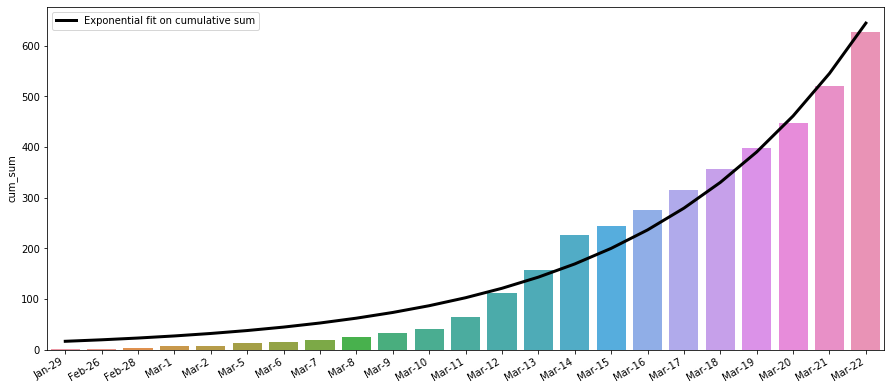

In [6]:
def exp_func(x, a, b, c):
    c = 0
    return a * np.exp(b * x) + c

date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in covid['new_dates']]
xdata = range(0,len(covid))
popt, pcov = curve_fit(exp_func, xdata, covid['cum_sum'])

fig,ax = plt.subplots(figsize=(15,7))
ax.plot(xdata, exp_func(xdata, *popt), 'k-',linewidth=3,label="Exponential fit on cumulative sum")
sns.barplot(x=date_mapping, y='cum_sum', data=covid,ax=ax)
fig.autofmt_xdate()
plt.legend()